In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import seaborn as sns

Using TensorFlow backend.


In [2]:
print("tensorflow version: {}".format(tf. __version__))

tensorflow version: 2.1.0


# Load and Show Images

In [3]:
source_dir = 'Dataset1'

In [4]:
#path into train and test images
train_images_dir = os.path.join(source_dir, 'images_prepped_train')
train_annotations_dir = os.path.join(source_dir, 'annotations_prepped_train')

In [5]:
img_size = 128

train_images = []
test_images = []

train_annotations = []
test_annotations = []


for index in range (len(os.listdir(train_images_dir))):
    image = cv2.imread(os.path.join(train_images_dir, os.listdir(train_images_dir)[index]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255 # normalize
    
    annotation = cv2.imread(os.path.join(train_annotations_dir, os.listdir(train_annotations_dir)[index]), cv2.IMREAD_UNCHANGED)
#     annotation = cv2.cvtColor(annotation, cv2.IMREAD_UNCHANGED)
    
    image_resize = cv2.resize(image, (img_size, img_size))
    annotation_resize = cv2.resize(annotation, (img_size, img_size))
    
    train_images.append(image_resize)
    train_annotations.append(annotation_resize)

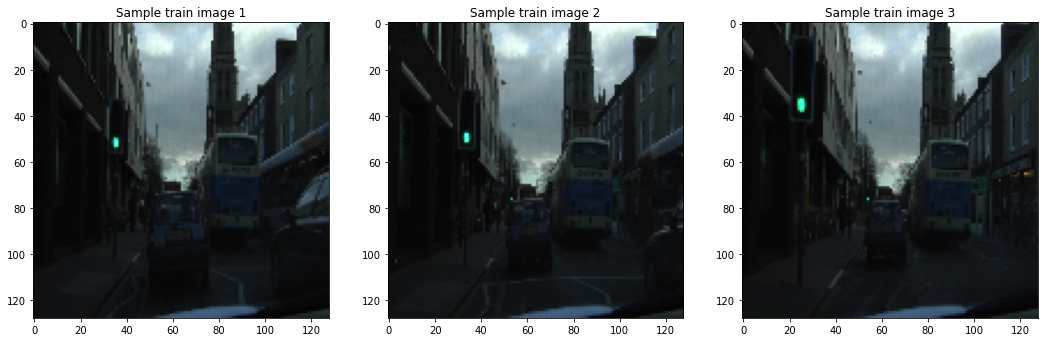

In [6]:
#Plot sample of train images
fig = plt.figure(figsize = (18,10))

for index in range(3):
    ax = fig.add_subplot(1,3,index+1)
    ax.set_title("Sample train image {}".format(index+1))
    ax.imshow(train_images[index], cmap='gray')


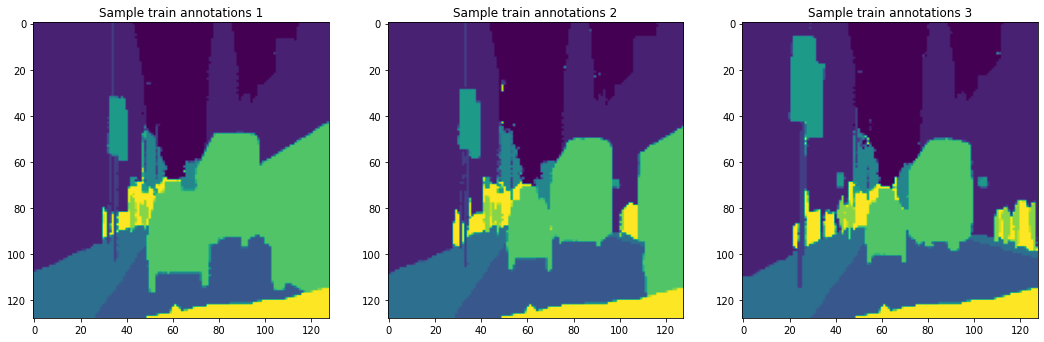

In [7]:
#Plot sample of train annotations
fig = plt.figure(figsize = (18,10))


for index in range(3):
#     image = mpimg.imread(os.path.join(train_annotations_dir, os.listdir(train_annotations_dir)[index]))
    ax = fig.add_subplot(1,3,index+1)
    ax.set_title("Sample train annotations {}".format(index+1))
    ax.imshow(train_annotations[index])

# Preprocessing Image

In [8]:
print("There are {} images in train images".format(len(os.listdir(train_images_dir))))
print("\nThere are {} images in train annotations".format(len(os.listdir(train_annotations_dir))))

There are 367 images in train images

There are 367 images in train annotations


In [9]:
print("shape of one sample image in train images dataset: {}".format(train_images[0].shape))
print("\nshape of one sample image in train annotations dataset: {}".format(train_annotations[0].shape))

shape of one sample image in train images dataset: (128, 128, 3)

shape of one sample image in train annotations dataset: (128, 128)


In [10]:
train_images = np.array(train_images)
train_annotations = np.array(train_annotations)

In [11]:
train_annotations = np.expand_dims(train_annotations, axis = 3)

In [12]:
# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(train_images, train_annotations, train_size = 0.65, test_size = 0.35, random_state = 1)

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (238, 128, 128, 3)
y_train shape: (238, 128, 128, 1)


In [14]:
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (129, 128, 128, 3)
y_test shape: (129, 128, 128, 1)


In [15]:
classes = np.unique(y_train)
num_class = len(classes)
print("classes in image: {} : \n {}".format(num_class, classes)) 

classes in image: 12 : 
 [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [16]:
#One hot encoding label using to_categorical 

label_train = to_categorical(y_train, num_class)
label_test = to_categorical(y_test, num_class)

In [17]:
print("image shape: {}".format(x_train.shape))
print("label shape: {}".format(label_train.shape))

image shape: (238, 128, 128, 3)
label shape: (238, 128, 128, 12)


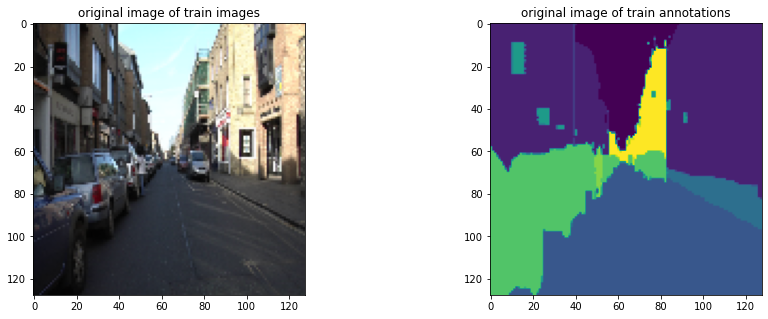

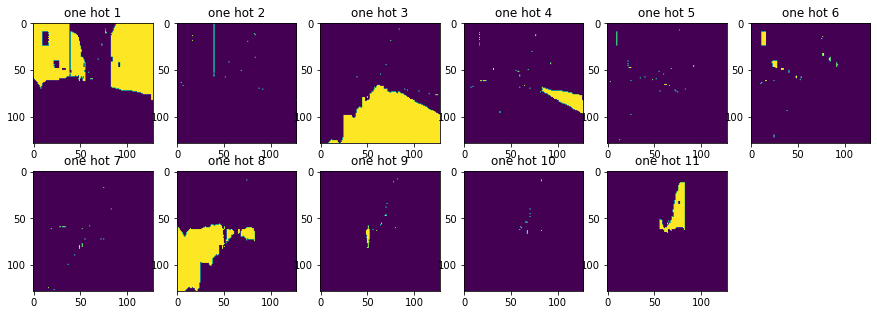

In [18]:
#Plot one hot encoding
fig = plt.figure(figsize = (15,5))
fig2 = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title("original image of train images")
ax1.imshow(x_train[0], cmap='gray')

ax2.set_title("original image of train annotations")
ax2.imshow(y_train[0])

for index in range(1, 12):
    ax = fig2.add_subplot(2,6, index)
    ax.set_title("one hot {}".format(index))
    ax.imshow(label_train[0][:,:,index])

plt.show()

# Train Model

In [19]:
height = x_train.shape[1]
width = x_train.shape[2]
channel = x_train.shape[3]

In [ ]:
#Unet model

inputs = Input((width,height,channel))

conv1 = Conv2D(64, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(inputs)
conv1 = Conv2D(64, 3, activation= 'relu',kernel_initializer='he_normal', padding = 'same')(conv1)
pool1 = MaxPooling2D(2,2)(conv1)

conv2 = Conv2D(128, 3, activation= 'relu', kernel_initializer='he_normal', padding = 'same')(pool1)
conv2 = Conv2D(128, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(conv2)
pool2 = MaxPooling2D(2,2)(conv2)

conv3 = Conv2D(256, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(pool2)
conv3 = Conv2D(256, 3, activation= 'relu',kernel_initializer='he_normal', padding = 'same')(conv3)
pool3 = MaxPooling2D(2,2)(conv3)

conv4 = Conv2D(512, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(pool3)
conv4 = Conv2D(512, 3, activation= 'relu',kernel_initializer='he_normal', padding = 'same')(conv4)
# dropout4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(2,2)(conv4)


conv5 = Conv2D(1024, 3, activation= 'relu',kernel_initializer='he_normal', padding = 'same')(pool4)
conv5 = Conv2D(1024, 3, activation= 'relu', kernel_initializer='he_normal',padding = 'same')(conv5)
dropout5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(UpSampling2D(size = (2,2))(dropout5))
merge6 = concatenate([conv4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', kernel_initializer='he_normal', padding = 'same')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu',kernel_initializer='he_normal', padding = 'same')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv8)
,
up9 = Conv2D(64, 2, activation = 'relu', kernel_initializer='he_normal', padding = 'same')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu',kernel_initializer='he_normal', padding = 'same')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu',kernel_initializer='he_normal', padding = 'same')(conv9)

conv9 = Conv2D(64, 3, activation = 'relu', kernel_initializer='he_normal',padding = 'same')(conv9)
conv10 = Conv2D(12, 1, activation = 'softmax')(conv9)

model = Model(inputs,conv10)
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
history = model.fit(
    x_train, 
    label_train, 
    validation_data=(x_test, label_test), 
    epochs=60, 
    batch_size=17,
    )

Train on 238 samples, validate on 129 samples
Epoch 1/60
238/238 [==============================] - 100s 420ms/sample - loss: 6.0293 - accuracy: 0.2272 - val_loss: 1.9629 - val_accuracy: 0.2488
Epoch 2/60
238/238 [==============================] - 106s 447ms/sample - loss: 1.9119 - accuracy: 0.3507 - val_loss: 1.8252 - val_accuracy: 0.3179
Epoch 3/60
238/238 [==============================] - 105s 443ms/sample - loss: 1.8002 - accuracy: 0.3767 - val_loss: 1.7213 - val_accuracy: 0.3896
Epoch 4/60
238/238 [==============================] - 104s 438ms/sample - loss: 1.4954 - accuracy: 0.5175 - val_loss: 1.2460 - val_accuracy: 0.6202
Epoch 5/60
238/238 [==============================] - 105s 442ms/sample - loss: 1.1640 - accuracy: 0.6524 - val_loss: 1.0969 - val_accuracy: 0.6613
Epoch 6/60
238/238 [==============================] - 106s 445ms/sample - loss: 1.0367 - accuracy: 0.6720 - val_loss: 1.0263 - val_accuracy: 0.6748
Epoch 7/60
238/238 [==============================] - 106s 444ms/s

In [ ]:
# model.save('semantic_model1.hdf5')
model.save('semantic_model2.hdf5')

In [20]:
load = load_model('semantic_model2.hdf5')

# Make a Prediction and Evaluate

In [21]:
y_pred=load.predict(x_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_pred_argmax.shape

(129, 128, 128)

In [22]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 12
IOU_keras = MeanIoU(num_classes=n_classes)   
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())  

Mean IoU = 0.50170237


In [23]:
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)

In [24]:
val = 0
total = 0
res = []

for i in range (n_classes):
    val = values[i,i]
    sum1 = 0
    
    for j in range(n_classes):
        sum1 = values[i,j] + sum1
    sum2 = 0
    
    for x in range(n_classes):
        if x != i:
            sum2 = values[x, i] + sum2  
        else:
            continue
    total = sum1 + sum2
    res.append(val/total)
    print("IoU class {}: {}".format(i,res[i]))        

IoU class 0: 0.9094357167327363
IoU class 1: 0.789171855206809
IoU class 2: 0.09969515259120297
IoU class 3: 0.9437317005971441
IoU class 4: 0.613199419430452
IoU class 5: 0.6740793255412915
IoU class 6: 0.22839965475162952
IoU class 7: 0.2818342631650565
IoU class 8: 0.7521233962377007
IoU class 9: 0.18508358336905273
IoU class 10: 0.14401921289123024
IoU class 11: 0.3996552219508691


<BarContainer object of 12 artists>

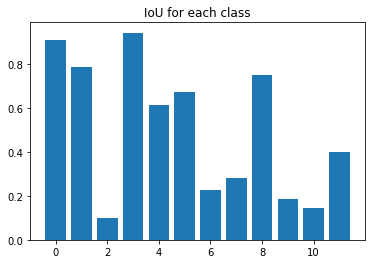

In [37]:
#plot IOU
index = []
for i in range (len(res)):
    index.append(i)
    
plt.title("IoU for each class")
plt.bar(index, res)

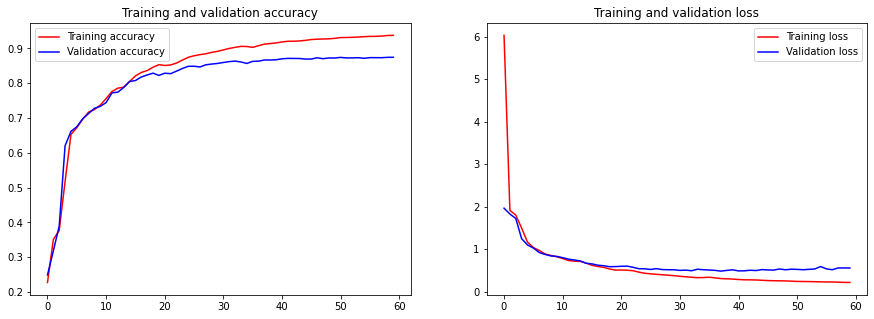

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend(loc=0)


ax2.plot(epochs, loss, 'r', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend(loc=0)


plt.show()

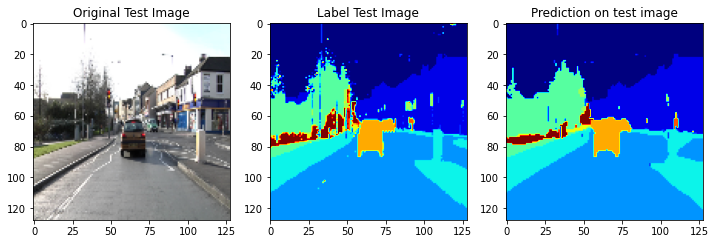

In [ ]:
#Plot Prediction Image

num = random.randint(0,len(x_test))

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.title('Original Test Image')
plt.imshow(x_test[num])

plt.subplot(232)
plt.title('Label Test Image')
plt.imshow(y_test[num], cmap ='jet')

plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(y_pred_argmax[num], cmap='jet')


plt.show()